First Part: Set-Up (for March)

In [1]:
#Import data & functions:
# Community packages
import os 
import numpy as np
np.random.seed(2019) 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from scipy import stats
from statsmodels.formula.api import ols
import pickle
from matplotlib.lines import Line2D

# Local packages
import smpfunc #SMP helper functions

# Import SLF SMP Package
from snowmicropyn import Profile, proksch2015, loewe2012

# Set constants
CUTTER_SIZE = 15 # Half the height of the density cutter in mm
WINDOW_SIZE = 5 # SMP analysis window in mm
H_RESAMPLE = 1 # delta height in mm for standardized SMP profiles
L_RESAMPLE = 50 # layer unit height in mm for SMP matching
MAX_STRETCH_LAYER = 0.75 # Max layer change in % of height
MAX_STRETCH_OVERALL = 0.15 # Max profile change in % of total height
NUM_TESTS = 10000

axis_value_size = 12
axis_label_size = 14

coeffs = pickle.load(open('./output/TVC/TVC_Merged_density_k19b_coeffs_incN.pkl', 'rb'))

import mat73

# Replace Josh's pit_density with Vicki's
TVC = mat73.loadmat('./data/TVC_March2019/TVC_March2019_.mat')
# Redefine upper level of structure (avoids text evaluation problem caused by ['TVC'])

tvc = TVC['TVC_March2019']

# Get list of pit names
pit_list = list(tvc.keys())

# Read in file showing nearest SMP profile to pits
nearest_smp = pd.read_excel('./data/TVC_March2019/NearestNeighbourSMP.xlsx', index_col='Pit')

def get_nearest_smp(pit):
    # Looks up nearest smp profile to pits from excel file, returns nan if not available
    try:
        return nearest_smp.loc[pit]['Nearest Neighbour SMP']
    except:
        return np.nan
    
    
def get_nearest_smp_data(pit):
    # Returns SMP data closest to pit, or NaN if not available
    if type(get_nearest_smp(pit)) == str:
        return pd.DataFrame(eval('tvc.' + pit + '.SMP.CroppedProfiles.' + get_nearest_smp(pit)), columns={'depth_smp', 'force'}).rename(columns={'depth_smp':'distance'})
    else:
        return np.nan
    
# Function to pull out single pit data from .mat file and put in pandas dataframe
def get_pit_density_data(pit):
    # Make dictionary
    obs = {'id': [pit] * len(tvc[pit].density.densityA), 'density': tvc[pit].density.densityA, 
           'top': tvc[pit].density.boundary_top, 'bottom': tvc[pit].density.boundary_btm}

    return pd.DataFrame(obs, columns={'id', 'density', 'top', 'bottom'})

# Extract density data from all pits
all_pits = [get_pit_density_data(p) for p in pit_list] # list of pandas dataframes

# Join list of dataframes
new_pit_density = pd.concat(all_pits)

#ALL GRAIN TYPE CELLS FROM PART1:

# Create list of grain types at resolution of density info
new_pit_density = new_pit_density.assign(TYPE = 'R') # initally all rounds, will overwrite to include other grain types

# Set others depending on whatever condition
# https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe

# Created new copy of notebook for each campaign so easy to re-write this cell for different campaigns

#Set Faceted Grains
new_pit_density.loc[(new_pit_density.top<=35) & (new_pit_density.id=='RP_01'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=31) & (new_pit_density.id=='RP_02'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=20) & (new_pit_density.id=='RP_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=31) & (new_pit_density.id=='RP_04'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=21) & (new_pit_density.id=='RP_05'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='RP_06'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='RP_07'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=16) & (new_pit_density.id=='RP_08'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=20) & (new_pit_density.id=='RP_09'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='RP_10'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=30) & (new_pit_density.id=='RP_11'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=22) & (new_pit_density.id=='RP_12'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=34) & (new_pit_density.id=='RP_13'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='RP_14'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=23) & (new_pit_density.id=='RP_15'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=20) & (new_pit_density.id=='RP_16'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='RP_17'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=24) & (new_pit_density.id=='RP_18'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=33) & (new_pit_density.id=='RP_19'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=26) & (new_pit_density.id=='RP_20'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=33) & (new_pit_density.top>=31) & (new_pit_density.id=='RP_21'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=28) & (new_pit_density.id=='RP_21'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=33) & (new_pit_density.id=='RP_22'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=32) & (new_pit_density.id=='RP_23'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=37) & (new_pit_density.id=='RP_24'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=48) & (new_pit_density.id=='RP_25'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=18) & (new_pit_density.id=='SC_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=38) & (new_pit_density.id=='SD_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='SM_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=19) & (new_pit_density.id=='SO_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=34) & (new_pit_density.top>=27) & (new_pit_density.id=='SR_03'), 'TYPE']='F' #Layer of slab sandwiched between facets
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='SR_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='ST_03'), 'TYPE']='F'
new_pit_density.loc[(new_pit_density.top<=15) & (new_pit_density.id=='SV_03'), 'TYPE']='F'

#Set New Snow
new_pit_density.loc[(new_pit_density.top>=41) & (new_pit_density.id=='RP_01'), 'TYPE']='N'
new_pit_density.loc[(new_pit_density.top>=38) & (new_pit_density.id=='RP_02'), 'TYPE']='N'
# No new snow for pits RP_03 to RP_07
new_pit_density.loc[(new_pit_density.top>=18) & (new_pit_density.id=='RP_08'), 'TYPE']='N'
# No new snow for pits RP_09 and RP_10
new_pit_density.loc[(new_pit_density.top>=30) & (new_pit_density.id=='RP_11'), 'TYPE']='N'
# No new snow for RP_12
new_pit_density.loc[(new_pit_density.top>=62) & (new_pit_density.id=='RP_13'), 'TYPE']='N' #Type set as "N", but description mentions crust
# No new snow for pits RP_14 to RP_18
new_pit_density.loc[(new_pit_density.top>=52) & (new_pit_density.id=='RP_19'), 'TYPE']='N'
# No new snow for pits RP_20 to RP_23
new_pit_density.loc[(new_pit_density.top>=52) & (new_pit_density.id=='RP_24'), 'TYPE']='N'
# No new snow for pits RP_25 to SM_03
new_pit_density.loc[(new_pit_density.top>=48) & (new_pit_density.id=='SR_03'), 'TYPE']='N'
# No new snow for pits ST_03 or SV_03

# Josh splits F (faceted) into F and D (Depth Hoar), which source data does not do. 
# Starting point is if strat_comment mentions depth hoar, convert manually as above
#(Considered using some sort of loop, but as had to do Facted grains manually and would have to convert to regular expressions, I'm not convinved it's worth it)

# Rule: F becomes D if "strat_comment" mentions "Depth Hoar" or "Hoar" (or a typo clearly meant to be one of these), BUT NOT "Indurated Hoar" or "Hoar Parting"

#Set Depth Hoar
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='RP_01'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=20) & (new_pit_density.id=='RP_02'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=9) & (new_pit_density.id=='RP_03'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=31) & (new_pit_density.id=='RP_04'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=21) & (new_pit_density.id=='RP_05'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='RP_06'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='RP_07'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=16) & (new_pit_density.id=='RP_08'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=20) & (new_pit_density.id=='RP_09'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='RP_10'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=30) & (new_pit_density.id=='RP_11'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=22) & (new_pit_density.id=='RP_12'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=34) & (new_pit_density.top>=30) & (new_pit_density.id=='RP_13'), 'TYPE']='D' 
new_pit_density.loc[(new_pit_density.top<=24) & (new_pit_density.id=='RP_13'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=31) & (new_pit_density.id=='RP_14'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=23) & (new_pit_density.id=='RP_15'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=17) & (new_pit_density.id=='RP_16'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=25) & (new_pit_density.id=='RP_17'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=24) & (new_pit_density.id=='RP_18'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=33) & (new_pit_density.id=='RP_19'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=26) & (new_pit_density.id=='RP_20'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=28) & (new_pit_density.id=='RP_21'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=24) & (new_pit_density.id=='RP_22'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=32) & (new_pit_density.id=='RP_23'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=37) & (new_pit_density.id=='RP_24'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=48) & (new_pit_density.id=='RP_25'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=18) & (new_pit_density.id=='SC_03'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=24) & (new_pit_density.id=='SD_03'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=27) & (new_pit_density.id=='SM_03'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=8) & (new_pit_density.id=='SO_03'), 'TYPE']='D'
new_pit_density.loc[(new_pit_density.top<=20) & (new_pit_density.id=='SR_03'), 'TYPE']='D'
# ST_03 all "indurated hoar", think I'm keeping this as "Facets"
new_pit_density.loc[(new_pit_density.top<=15) & (new_pit_density.id=='SV_03'), 'TYPE']='D'



# Function 2: Find location of ice lenses

# Set layers containing ice as above:
# Surface crusts:
new_pit_density.loc[(new_pit_density.top>=41) & (new_pit_density.id=='RP_01'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=40) & (new_pit_density.id=='RP_02'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=29) & (new_pit_density.id=='RP_03'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=39) & (new_pit_density.id=='RP_04'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=35) & (new_pit_density.id=='RP_05'), 'TYPE']='I'
# No surface crust at pit RP_06
new_pit_density.loc[(new_pit_density.top>=33) & (new_pit_density.id=='RP_07'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=18) & (new_pit_density.id=='RP_08'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=45) & (new_pit_density.id=='RP_09'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=42) & (new_pit_density.id=='RP_10'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=52) & (new_pit_density.id=='RP_11'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=41) & (new_pit_density.id=='RP_12'), 'TYPE']='I'
# No surface crust at pits RP_13 or RP_14
new_pit_density.loc[(new_pit_density.top>=44) & (new_pit_density.id=='RP_15'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=20) & (new_pit_density.id=='RP_16'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=35) & (new_pit_density.id=='RP_17'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=32) & (new_pit_density.id=='RP_18'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=52) & (new_pit_density.id=='RP_19'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=26) & (new_pit_density.id=='RP_20'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=32) & (new_pit_density.id=='RP_21'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=40) & (new_pit_density.id=='RP_22'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=51) & (new_pit_density.id=='RP_23'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=59) & (new_pit_density.id=='RP_24'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=73) & (new_pit_density.id=='RP_25'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=20) & (new_pit_density.id=='SC_03'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=50) & (new_pit_density.id=='SD_03'), 'TYPE']='I'
new_pit_density.loc[(new_pit_density.top>=39) & (new_pit_density.id=='SM_03'), 'TYPE']='I'
# No surface crust at pit SO_03
new_pit_density.loc[(new_pit_density.top>=48) & (new_pit_density.id=='SR_03'), 'TYPE']='I'
# No surface crust for ST_03 or SV_03


Second Part: Analysis and Plotting Loop for March

RP_02
R2 = 0.9461608220802733
RMSE = 90.62170469457146
./output/TVC/Fitting/Round_1/March/Figure_RP_02.png
RP_04


C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 = 0.28584383414045944
RMSE = 95.92482062359596
./output/TVC/Fitting/Round_1/March/Figure_RP_04.png
RP_05
R2 = 0.9100946983207585
RMSE = 82.13888824441199
./output/TVC/Fitting/Round_1/March/Figure_RP_05.png
RP_06
R2 = 0.8940455534591946
RMSE = 48.68039546681226
./output/TVC/Fitting/Round_1/March/Figure_RP_06.png
RP_07
R2 = 0.8636645360588671
RMSE = 118.16906875979896
./output/TVC/Fitting/Round_1/March/Figure_RP_07.png
RP_08
R2 = -0.19991642126680711
RMSE = 82.53832803620752
./output/TVC/Fitting/Round_1/March/Figure_RP_08.png
SC_03


C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\snowmicropyn\loewe2012.py:58: RuntimeWarning: invalid value encountered in double_scalars
  delta = -(3. / 2) * c_f[n - 1] / (c_f[n] - c_f[n - 1]) * spatial_res
C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\snowmicropyn\loewe2012.py:61: RuntimeWarning: invalid value encountered in double_scalars
  lambda_ = (4. / 3) * (k1 ** 2) / k2 / delta  # Intensity
C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\snowmicropyn\loewe2012.py:62: RuntimeWarning: invalid value encountered in double_scalars
  f0 = (3. / 2) * k2 / k1
C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\snowmicropyn\proksch2015.py:39: RuntimeWarning: divide by zero encountered in log
  density = a1 + a2 * np.log(fm) + a3 * np.log(fm) * l + a4 * l
C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\snowmicropyn\proksch2015.py:39: RuntimeWarning: invalid value encountered in double_scalars
  density = a1 + a2 * np.log(fm) + a3 * n

R2 = -0.3848484937388031
RMSE = 145.34405255958072
./output/TVC/Fitting/Round_1/March/Figure_SC_03.png
SD_03
R2 = 0.1044085427549816
RMSE = 71.50804247401902
./output/TVC/Fitting/Round_1/March/Figure_SD_03.png
SM_03


C:\Users\vicki\Anaconda\envs\smp-sea-ice\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


R2 = 0.9847243757343664
RMSE = 157.70909129522235
./output/TVC/Fitting/Round_1/March/Figure_SM_03.png
SO_03
R2 = 0.7304267836315108
RMSE = 5.249644105249778
./output/TVC/Fitting/Round_1/March/Figure_SO_03.png
SR_03
R2 = 0.09979672127183295
RMSE = 95.431271169078
./output/TVC/Fitting/Round_1/March/Figure_SR_03.png
ST_03
R2 = 0.12077643890721679
RMSE = 83.47876637041303
./output/TVC/Fitting/Round_1/March/Figure_ST_03.png
SV_03
R2 = 0.1333361144165527
RMSE = 56.8895310434688
./output/TVC/Fitting/Round_1/March/Figure_SV_03.png


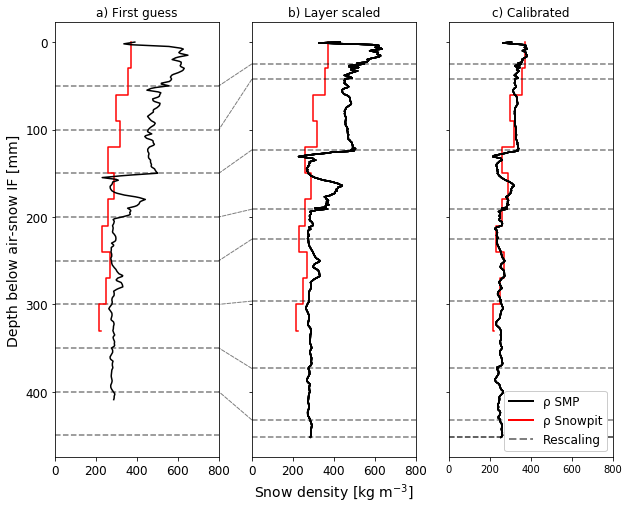

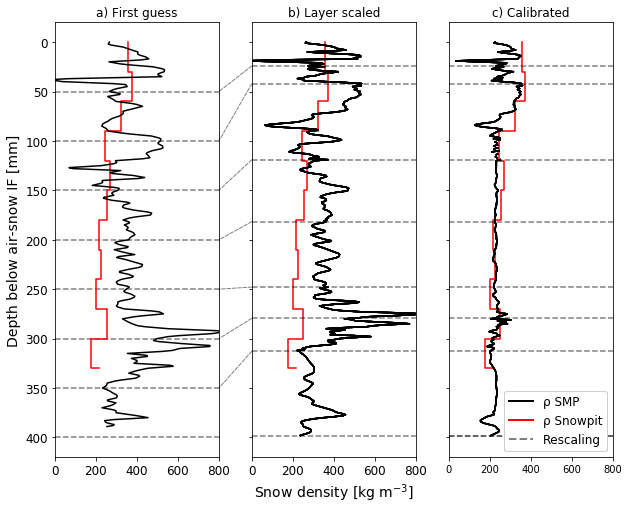

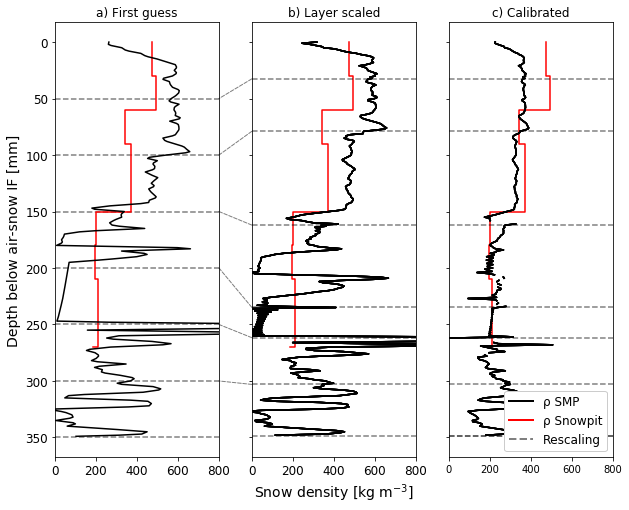

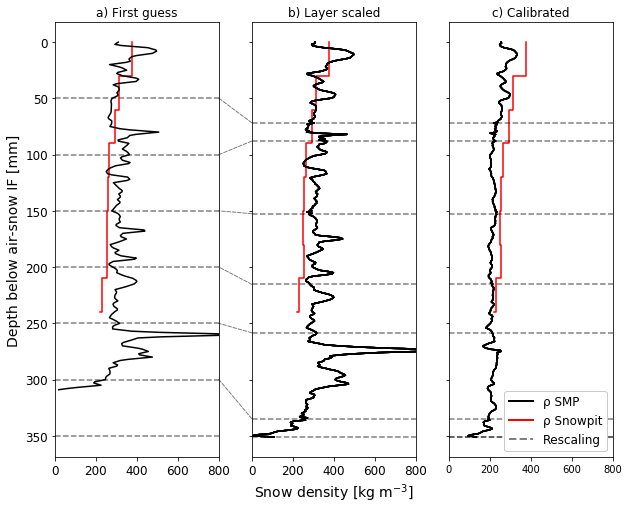

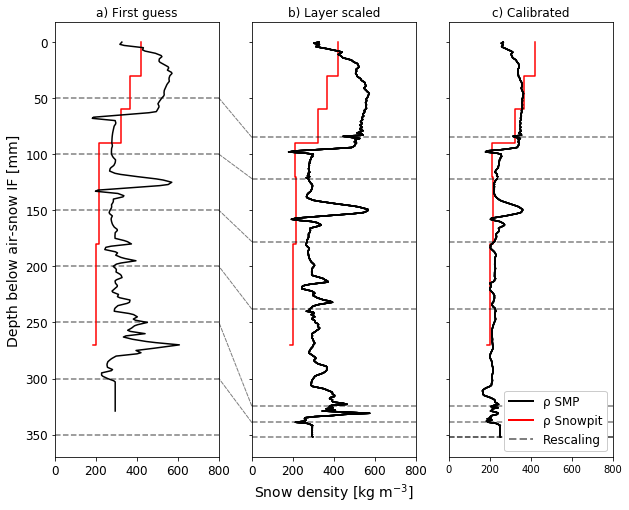

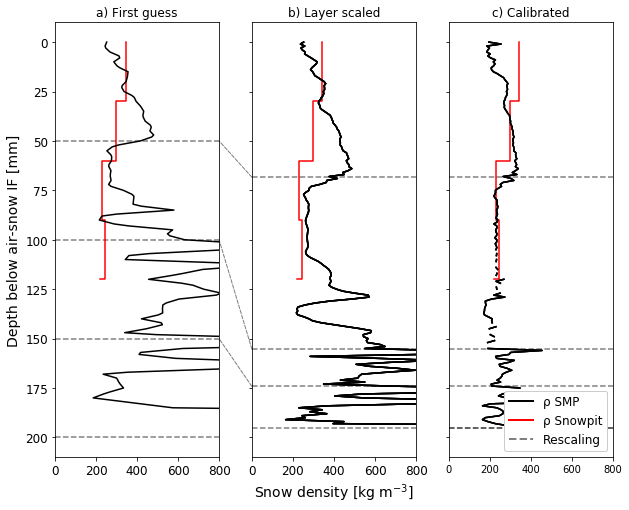

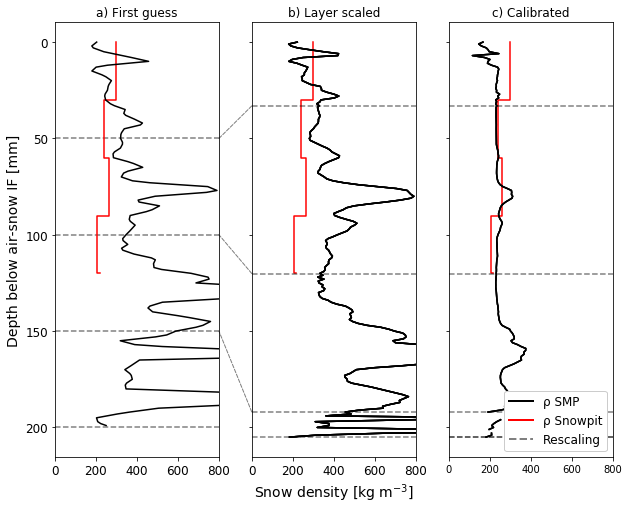

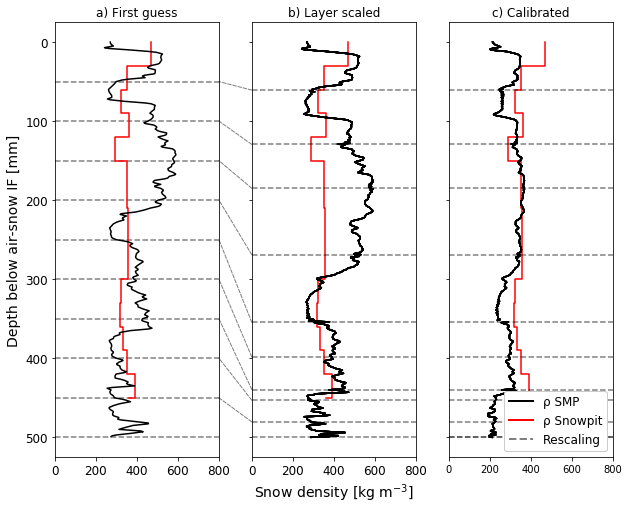

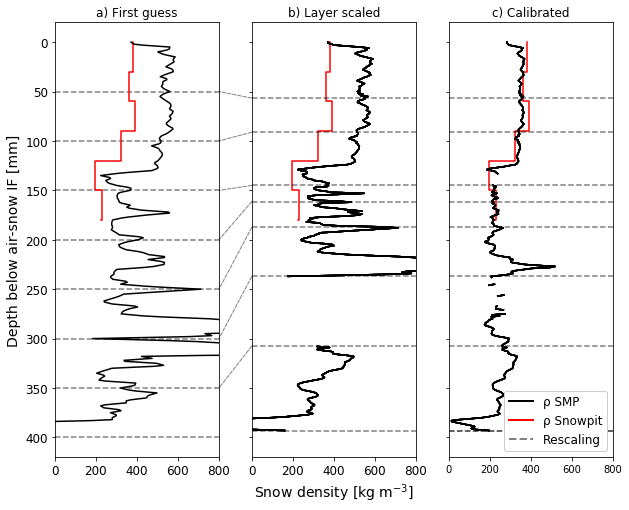

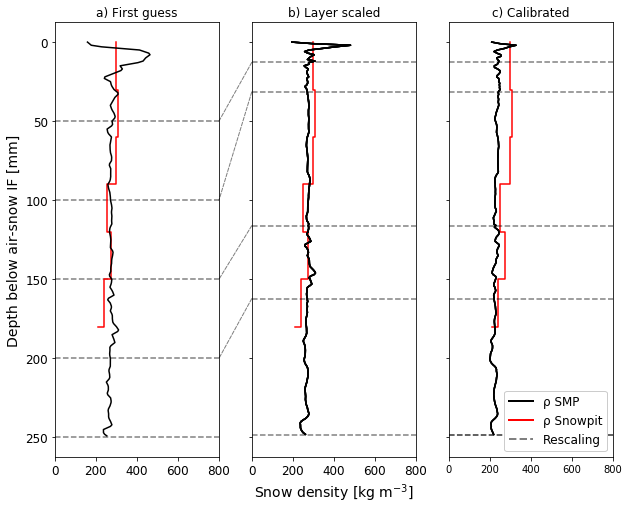

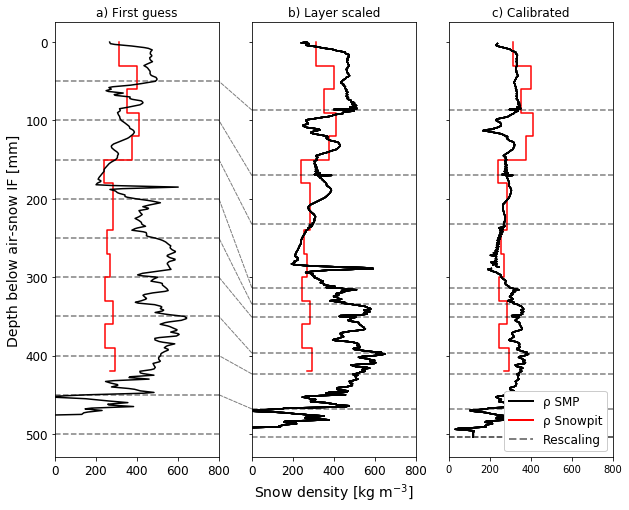

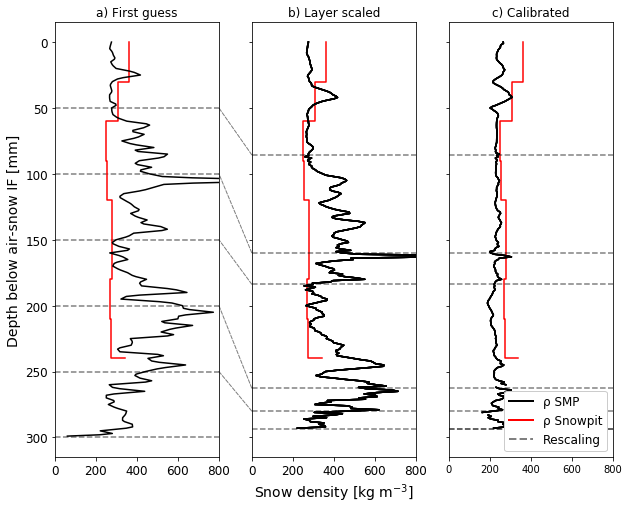

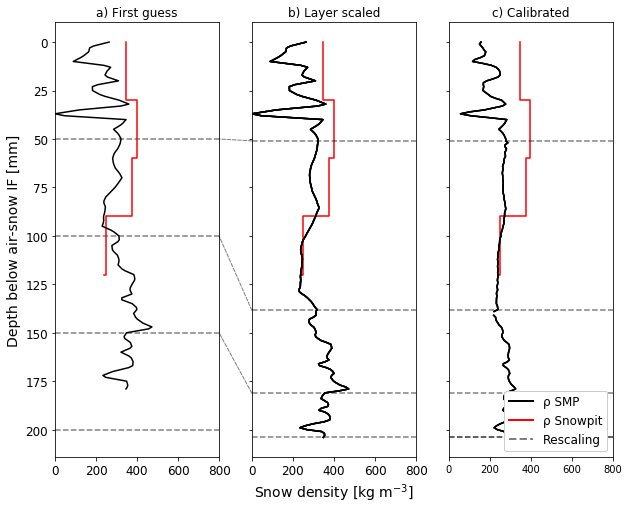

In [2]:
#Create all the dataframes to collate data for all pits
all_smp_df = pd.DataFrame()
comparison_df = pd.DataFrame()
all_scaled_force_df = pd.DataFrame()
all_scaled_l_df = pd.DataFrame()
min_scaling_coeffs = pd.DataFrame()
all_minscale_idx = pd.DataFrame()
all_scaled_distance = pd.DataFrame()
all_rescaling_df = pd.DataFrame()
all_densities_df = pd.DataFrame()
metrics_allpits_df = pd.DataFrame()

#run analysis on all pits, then plot in same loop
for p in pit_list: 
   # Extract smp data for profile nearest to snowpit
    nearest_smp_profile = get_nearest_smp_data(p)
    # Only pick out pits with nearest smp
    # Will ignore pits that return NaN (not a pandas dataframe) for get_nearest_smp_data
    if isinstance(nearest_smp_profile, pd.DataFrame):
        print (p)
        # Get density data
        density_df = new_pit_density[new_pit_density.id == p].rename(columns={'density': 'RHO'})
        # Add in relative height
        # Think this is defined as distance of layer midpoint from surface, in mm
        cutter_size = float(stats.mode(density_df.top.iloc[0] - density_df.bottom).mode) 
        ### THIS LINE HERE.
        density_df = density_df.assign(relative_height_mm = (density_df.top[0] - density_df.bottom - cutter_size / 2) * 10) 
        
        # Linear interpolation of SMP data (so have no NaN values)
        nearest_smp_profile = nearest_smp_profile.interpolate(method='linear', limit_direction='forward', axis=0)

        # Make first guess at microstructure based on original profile
        l2012 = loewe2012.calc(nearest_smp_profile, window=WINDOW_SIZE)
        p2015 = proksch2015.calc(nearest_smp_profile, window=WINDOW_SIZE)

        # Estimate offset of the snow depth and SMP profile
        smp_profile_height = p2015.distance.max()
        smp_height_diff = density_df.top.iloc[0] * 10 - smp_profile_height

       # Create new SMP resampled arrays and determine the number of layers
        depth_array = np.arange(0, p2015.distance.max() + smp_height_diff, H_RESAMPLE)
        density_array = np.interp(depth_array,p2015.distance,p2015.P2015_density)
        force_array = np.interp(depth_array,p2015.distance,l2012.force_median)
        l_array = np.interp(depth_array,p2015.distance,l2012.L2012_L)
        id_array = p

        smp_df = pd.DataFrame({'distance': depth_array, 
                               'density': density_array,
                               'force_median': force_array,
                               'l': l_array, 
                               'id':id_array,})
        
        all_smp_df = all_smp_df.append(smp_df)
        
 #new cell in original       
        num_sections = np.ceil(len(smp_df.index)/L_RESAMPLE).astype(int)
        random_tests = [smpfunc.random_stretch(x, MAX_STRETCH_OVERALL, MAX_STRETCH_LAYER) for x in np.repeat(num_sections, NUM_TESTS)] 

        scaled_profiles = [smpfunc.scale_profile(test, smp_df.distance.values, smp_df.density.values, L_RESAMPLE, H_RESAMPLE) for test in random_tests]
        compare_profiles = [smpfunc.extract_samples(dist, rho, density_df.relative_height_mm.values, CUTTER_SIZE) for dist, rho in scaled_profiles]
        compare_profiles = [pd.concat([profile, density_df.reset_index()], axis=1, sort=False) for profile in compare_profiles]
        retrieved_skill = [smpfunc.calc_skill(profile, CUTTER_SIZE) for profile in compare_profiles]
        retrieved_skill = pd.DataFrame(retrieved_skill,columns = ['r','rmse','rmse_corr','mae'])

        min_scaling_idx = retrieved_skill.sort_values(['r', 'rmse_corr'], ascending=[False, True]).head(1).index.values
        min_scaling_coeff = random_tests[int(min_scaling_idx)]
        min_scaling_df = pd.DataFrame(min_scaling_coeff, columns = {'min_scaling_coeff'})
        min_scaling_df = min_scaling_df.assign(pit_name = p)
        min_scaling_coeffs = min_scaling_coeffs.append(min_scaling_df)

        dist, scaled_l =  smpfunc.scale_profile(min_scaling_coeff, smp_df.distance.values, smp_df.l.values, L_RESAMPLE, H_RESAMPLE)
        dist, scaled_force_median = smpfunc.scale_profile(min_scaling_coeff, smp_df.distance.values, smp_df.force_median.values, L_RESAMPLE, H_RESAMPLE)

        result = compare_profiles[int(min_scaling_idx)].assign(l=smpfunc.extract_samples(dist, scaled_l, density_df.relative_height_mm.values, CUTTER_SIZE).mean_samp,
                                          force_median=smpfunc.extract_samples(dist, scaled_force_median, density_df.relative_height_mm.values, CUTTER_SIZE).mean_samp)
        comparison_df = comparison_df.append(result, ignore_index=True)
        min_scaling_idx_df = pd.DataFrame(min_scaling_idx)
        min_scaling_idx_df =  min_scaling_idx_df.assign(pit_name = p)
        all_minscale_idx = min_scaling_idx_df.append(min_scaling_idx_df)
        scaled_force_df =  pd.DataFrame (scaled_force_median, columns = {'scaled_force'})
        scaled_force_df =  scaled_force_df.assign(pit_name = p)       
        all_scaled_force_df = all_scaled_force_df.append(scaled_force_df)
        scaled_l_df = pd.DataFrame(scaled_l, columns = {'scaled_l'})
        scaled_l_df =  scaled_l_df.assign(pit_name = p)
        all_scaled_l_df = all_scaled_l_df.append(scaled_l_df)
        scaled_distance_df = pd.DataFrame(dist, columns = {'distance'})
        scaled_distance_df = scaled_distance_df.assign(pit_name = p)
        all_scaled_distance = all_scaled_distance.append(scaled_distance_df)

#new cell in original

        scaling_coeffs = min_scaling_coeffs[min_scaling_coeffs['pit_name'].str.contains(p)]
    
        layer_thickness_scaled = L_RESAMPLE + (scaling_coeffs.min_scaling_coeff * L_RESAMPLE)
        layer_height_scaled = layer_thickness_scaled.cumsum()

        layer_thickness = np.repeat(L_RESAMPLE, num_sections)
        layer_height = layer_thickness.cumsum()
    
        id_array = p

        rescaling_df = pd.DataFrame({'layer_height': layer_height, 'layer_thickness': layer_thickness, 'layer_height_scaled': layer_height_scaled, 'layer_thickness_scaled': layer_thickness_scaled, 'id': id_array})
        all_rescaling_df =  all_rescaling_df.append(rescaling_df)
            
#new cell in original
        scaled_force_df = all_scaled_force_df[all_scaled_force_df['pit_name'].str.contains(p)]
        scaled_l_df = all_scaled_l_df[all_scaled_l_df['pit_name'].str.contains(p)]
        
        density_k2019 = coeffs[0] + coeffs[1] * np.log(scaled_force_df.scaled_force) \
        + coeffs[2] * np.log(scaled_force_df.scaled_force) * scaled_l_df.scaled_l \
        + coeffs[3] * scaled_l_df.scaled_l
        id_array = p
        density_df = pd.DataFrame({'density': density_k2019,'id': id_array})
        all_densities_df = all_densities_df.append(density_df)
        
#Summary Stats
        #intermeadiate dataframe for just the pit looking at
        cleaned_comparison = comparison_df[comparison_df['id'].str.contains(p)]

        # Correlation after alignment
        R2 = np.corrcoef(cleaned_comparison.RHO, cleaned_comparison.mean_samp)[1][0]
        print('R2 = ' + str(R2))

        # RMSE after alignment
        RMSE = (np.sqrt(np.mean(cleaned_comparison.RHO - cleaned_comparison.mean_samp)**2))
        print ('RMSE = ' + str(RMSE))
        id_array = p

        fitting_Metrics_df = pd.DataFrame({'R2': R2, 'RMSE': RMSE, 'id': id_array}, index=[0])
        metrics_allpits_df =  metrics_allpits_df.append(fitting_Metrics_df)
#Plot
        mpl.rcParams['text.usetex'] = False  # not really needed
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,8))
        ax1.tick_params(axis='both', which='major', labelsize=axis_value_size)
        ax2.tick_params(axis='both', which='major', labelsize=axis_value_size)

        cleaned_rescaling = all_rescaling_df[all_rescaling_df['id'].str.contains(p)]
        cleaned_density = all_densities_df[all_densities_df['id'].str.contains(p)]
        cleaned_scaled_dist = all_scaled_distance[all_scaled_distance['pit_name'].str.contains(p)]
        cleaned_smp_df = all_smp_df[all_smp_df['id'].str.contains(p)]
    
        xmax = 800
        xmin = 0

        for l in cleaned_rescaling.layer_height:
            ax1.axhline(y=l, color = 'k', alpha = 0.5, ls = 'dashed')
            
        #Plots red line of snowpit measurements - still need to work how to only access RHO/relative_height_mm for a certain value of "id" (ie. for just one pit at a time)
        ax1.step(cleaned_comparison.RHO, cleaned_comparison.relative_height_mm-15, color = 'r')
        ax2.step(cleaned_comparison.RHO, cleaned_comparison.relative_height_mm-15, color = 'r')
        ax3.step(cleaned_comparison.RHO, cleaned_comparison.relative_height_mm-15, color = 'r', 
         label =  r'$\rho_{\mathrm{pit}}$')
        
        ax1.plot(cleaned_smp_df.density, cleaned_smp_df.distance, color = 'k') #changed to equivalent parameters from all_smp_df to be able to loop for each pit

        for l in cleaned_rescaling.layer_height_scaled:
        #code takes 5cm layers from original profile, and adjusts thier size by up to 70% to best fit the snowpit measurements
            ax2.axhline(y=l, color = 'k', alpha = 0.5, ls = 'dashed')
            ax3.axhline(y=l, color = 'k', alpha = 0.5, ls = 'dashed') 
            ax2.plot(scaled_profiles[int(min_scaling_idx)][1],
         scaled_profiles[int(min_scaling_idx)][0], color = 'k') #resizing of layers as explained above, need to work out how to access this for just the pit I want to plot

        for i in np.arange(0, len(cleaned_rescaling.layer_height)-1):
            xy = (xmin,cleaned_rescaling.layer_height_scaled[i])
            xy1 = (xmax,cleaned_rescaling.layer_height[i])
            con = ConnectionPatch(xyA=xy, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax2, axesB=ax1, color="k", alpha = 0.5, ls = 'dashed')
            ax2.add_artist(con)#artist is some sort of axis property, this is just nitty-gritty of plotting, rather than anything going on with the actual data?
    
            ax3.plot(cleaned_density.density,scaled_profiles[int(min_scaling_idx)][0], 
             color = 'k', label = r'$\rho_{\mathrm{smp}}$')# application of recalibrated coefficients to recalibrate density from SMP force and L measurements. 

        #ax1.set_ylim(0,500) # set limit on snow depth in mm, can easily overwrite
        ax1.set_xlim(xmin,xmax)
        ax2.set_xlim(xmin,xmax)
        ax3.set_xlim(xmin,xmax)
        
        ax3.axhline(y=l, color = 'k', alpha = 0.5, ls = 'dashed', label = 'Layer')

        ax1.set_ylabel('Depth below air-snow IF [mm]', fontsize=axis_label_size)

        ax2.set_xlabel('Snow density [kg m$\mathregular{^{-3}}$]', fontsize=axis_label_size)

        ax1.set_title('a) First guess')
        ax2.set_title('b) Layer scaled')
        ax3.set_title('c) Calibrated')

        ax1.invert_yaxis()
        ax2.invert_yaxis()
        ax3.invert_yaxis()
        custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='0.5', lw=2, ls='--')]

        ax3.legend(custom_lines, ['ρ SMP', 'ρ Snowpit', 'Rescaling'], fontsize=12, framealpha=1, loc ='lower right')
        filedirectory="./output/TVC/Fitting/Round_1/March/" # Define path to folder

        newfilename="Figure_"+p
        fullpath=filedirectory+newfilename+".png"
        print(fullpath)
        f.savefig(fullpath)

In [4]:
#Export all collated dataframes to .csv 
#This way, if figure here is bollocks, can hopefully do it in matlab

all_densities_df.to_csv('./output/TVC/all_densities_march.csv',na_rep='NaN')
all_rescaling_df.to_csv('./output/TVC/all_rescaling_march.csv',na_rep='NaN')
all_smp_df.to_csv('./output/TVC/all_smp_march.csv',na_rep='NaN')
metrics_allpits_df.to_csv('./output/TVC//Fitting/Round_1/fitting_metrics_march.csv',na_rep='NaN')

Third Part: Normalised Plots of a) Recalibrated SMP Profiles and b) Snowpit density measurements to look at site-wide averages and variablity

./output/TVC/Fitting/Round_1/March/Normalised_AllPits.png


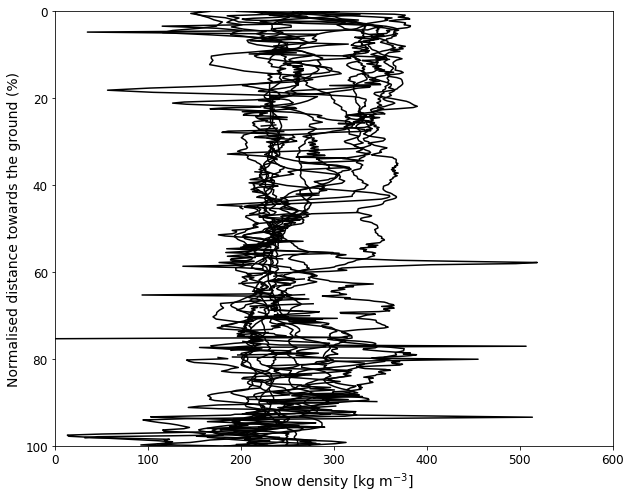

In [10]:
#Normalised SMP plot
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10,8))
ax1.tick_params(axis='both', which='major', labelsize=axis_value_size)
all_normalised_profiles = pd.DataFrame()

for p in pit_list:
    # Extract smp data for profile nearest to snowpit
    nearest_smp_profile = get_nearest_smp_data(p)
    # Only pick out pits with nearest smp
    # Will ignore pits that return NaN (not a pandas dataframe) for get_nearest_smp_data
    if isinstance(nearest_smp_profile, pd.DataFrame):
    #print(p)

        cleaned_comparison = comparison_df[comparison_df['id'].str.contains(p)]
        cleaned_rescaling = all_rescaling_df[all_rescaling_df['id'].str.contains(p)]
        cleaned_density = all_densities_df[all_densities_df['id'].str.contains(p)]
        cleaned_scaled_dist = all_scaled_distance[all_scaled_distance['pit_name'].str.contains(p)]
        cleaned_smp_df = all_smp_df[all_smp_df['id'].str.contains(p)]
    
        norm_distance = ((cleaned_smp_df.distance/(max(cleaned_smp_df.distance)))*100)
        norm_distance_scaled = ((cleaned_scaled_dist.distance/(max(cleaned_scaled_dist.distance)))*100)
        
        normalised_profiles_df = pd.DataFrame({'rescaled_density': cleaned_density.density, 'normalised_distance': norm_distance_scaled, 'id': cleaned_density.id}, index = [0])
        all_normalised_profiles = all_normalised_profiles.append(normalised_profiles_df)
        
        xmax = 600
        xmin = 0
    
        ax1.plot(cleaned_density.density, norm_distance_scaled, color = 'k')

        ax1.set_ylim(0,100)
        ax1.set_xlim(xmin,xmax)

        ax1.set_ylabel('Normalised distance towards the ground (%)', fontsize=axis_label_size)

        ax1.set_xlabel('Snow density [kg m$\mathregular{^{-3}}$]', fontsize=axis_label_size)

    #ax1.set_title('') #not sure what title should be


        ax1.invert_yaxis()

# Filename is what is changing all the time and right now is its just set at SV_02.png.
filedirectory="./output/TVC/Fitting/Round_1/March/" # Define path to folder

newfilename="Normalised_AllPits"
fullpath=filedirectory+newfilename+".png"
print(fullpath)
f.savefig(fullpath)
all_normalised_profiles.to_csv('./output/TVC/normalised_profiles_march.csv', na_rep= 'NaN')